In [1]:
import pandas as pd
import numpy as np

# Import Files

In [2]:
# dimension tables
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')

#fact tables
df_aggregated_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_bookings = pd.read_csv('datasets/fact_bookings.csv')


In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings[['booking_id','property_id','booking_date']]

,booking_id,property_id,booking_date
0,May012216558RT11,16558,27-04-22
1,May012216558RT12,16558,30-04-22
2,May012216558RT13,16558,28-04-22
3,May012216558RT14,16558,28-04-22
4,May012216558RT15,16558,27-04-22
...,...,...,...
134585,Jul312217564RT46,17564,29-07-22
134586,Jul312217564RT47,17564,30-07-22
134587,Jul312217564RT48,17564,30-07-22
134588,Jul312217564RT49,17564,29-07-22


# Data Exploration

In [5]:
df_bookings.shape

(134590, 12)

In [6]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

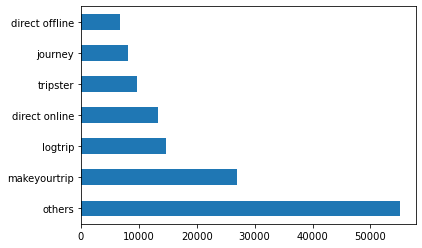

In [8]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [13]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [14]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [15]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [16]:
df_aggregated_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [17]:
df_aggregated_bookings[df_aggregated_bookings['successful_bookings']>df_aggregated_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [18]:
df_aggregated_bookings.capacity.max()

50.0

In [19]:
df_aggregated_bookings.loc[df_aggregated_bookings['capacity']==df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# Data Cleansing

In [20]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [21]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [22]:
df_bookings[df_bookings['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [23]:
df_bookings = df_bookings[df_bookings['no_guests']>0]

In [24]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77899
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [25]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [26]:
avg , std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [27]:
avg , std

(15378.036937686695, 93040.15493143328)

In [28]:
higher_limit = avg + 3*std

In [29]:
higher_limit

294498.50173198653

In [30]:
lower_limit = avg - 3*std

In [31]:
lower_limit

-263742.4278566132

In [32]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]

In [33]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [34]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 45220)

In [35]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [36]:
avg, std = df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()

In [37]:
avg, std

(12695.983585117372, 6927.791692242509)

In [38]:
higher_limit = avg + 3*std

In [39]:
higher_limit

33479.3586618449

In [40]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [41]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [42]:
23439.308444 + 3*9048.599076

50585.105672000005

In [43]:
23439.308444 - 3*9048.599076

-3706.4887840000047

In [44]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [45]:
df_aggregated_bookings[df_aggregated_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [46]:
df_aggregated_bookings['capacity'].median()

25.0

In [47]:
df_aggregated_bookings.capacity.fillna(df_aggregated_bookings['capacity'].median(),inplace=True)

In [48]:
df_aggregated_bookings[df_aggregated_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [49]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings>df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# Data Transformation

In [50]:
df_aggregated_bookings['Occ%'] = df_aggregated_bookings['successful_bookings']/df_aggregated_bookings['capacity']

In [51]:
df_aggregated_bookings['Occ%'] = df_aggregated_bookings['Occ%'].apply(lambda x:round(x*100,2))
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# Insights Generation

**1. What is an average occupancy rate in each of the room categories?**

In [52]:
df_aggregated_bookings.groupby(df_aggregated_bookings.room_category)['Occ%'].mean()

room_category
RT1    58.232748
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: Occ%, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [53]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [54]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [55]:
room_data = df_aggregated_bookings.merge(df_rooms,left_on='room_category',right_on='room_id')

In [56]:
room_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [57]:
room_data.drop("room_id",axis=1, inplace=True)
room_data.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


In [58]:
room_data.groupby(room_data.room_class)['Occ%'].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.232748
Name: Occ%, dtype: float64

**2. Print average occupancy rate per city**

In [59]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [60]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [61]:
hotel_data = df_aggregated_bookings.merge(df_hotels,on='property_id')

In [62]:
hotel_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,1-May-22,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,2-May-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [63]:
hotel_data.groupby(hotel_data.city)['Occ%'].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.943142
Name: Occ%, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [64]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [65]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [66]:
date_data = df_aggregated_bookings.merge(df_date,left_on='check_in_date',right_on='date')

In [67]:
date_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,10-May-22,May 22,W 20,weekeday


In [68]:
date_data.drop("date",axis = 1,inplace=True)

In [69]:
date_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ%,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,May 22,W 20,weekeday


In [70]:
date_data.groupby('day_type')['Occ%'].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: Occ%, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [71]:
date_data.groupby('day_type')['Occ%'].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: Occ%, dtype: float64

In [72]:
date_data.rename(columns={"mmm yy": "mmm_yy", "week no": "week_no","Occ%": "occ_pct"},inplace=True)

In [73]:
date_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm_yy,week_no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,May 22,W 20,weekeday


In [74]:
june_data = date_data[date_data.mmm_yy=="Jun 22"]
june_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm_yy,week_no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Jun 22,W 24,weekeday


In [75]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [76]:
city_data = june_data.merge(df_hotels,on='property_id')
city_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm_yy,week_no,day_type,property_name,category,city
0,16559,10-Jun-22,RT1,20,30.0,66.67,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai
1,16559,10-Jun-22,RT2,26,41.0,63.41,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai
2,16559,10-Jun-22,RT3,20,32.0,62.50,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai
3,16559,10-Jun-22,RT4,11,18.0,61.11,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai
4,16559,11-Jun-22,RT1,27,30.0,90.00,Jun 22,W 24,weekend,Atliq Exotica,Luxury,Mumbai


In [77]:
city_data.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

<AxesSubplot:ylabel='city'>

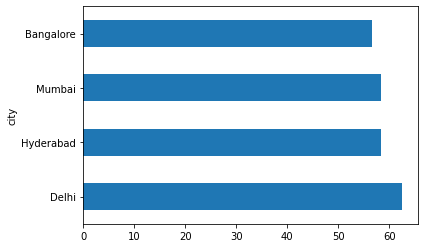

In [78]:
city_data.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending = False).plot(kind='barh')

**5: We got new data for the month of august. Append that to existing data**

In [79]:
august_data = pd.read_csv('datasets/new_data_august.csv')
august_data.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [80]:
august_data.rename(columns = {'occ%':'occ_pct','mmm yy':'mmm_yy','week no':'week_no'},inplace=True)

In [81]:
august_data.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm_yy,week_no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [82]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [83]:
final_data = city_data.merge(df_rooms,left_on='room_category',right_on='room_id')

In [84]:
final_data.drop('room_id', axis=1,inplace=True)

In [85]:
final_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm_yy,week_no,day_type,property_name,category,city,room_class
0,16559,10-Jun-22,RT1,20,30.0,66.67,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai,Standard
1,16559,11-Jun-22,RT1,27,30.0,90.00,Jun 22,W 24,weekend,Atliq Exotica,Luxury,Mumbai,Standard
2,16559,12-Jun-22,RT1,28,30.0,93.33,Jun 22,W 25,weekend,Atliq Exotica,Luxury,Mumbai,Standard
3,16559,13-Jun-22,RT1,18,30.0,60.00,Jun 22,W 25,weekeday,Atliq Exotica,Luxury,Mumbai,Standard
4,16559,14-Jun-22,RT1,18,30.0,60.00,Jun 22,W 25,weekeday,Atliq Exotica,Luxury,Mumbai,Standard


In [86]:
final_data.shape

(2100, 13)

In [87]:
new_df = pd.concat([final_data,august_data],ignore_index=True,axis = 0)

In [88]:
new_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm_yy,week_no,day_type,property_name,category,city,room_class
0,16559,10-Jun-22,RT1,20,30.0,66.67,Jun 22,W 24,weekeday,Atliq Exotica,Luxury,Mumbai,Standard
1,16559,11-Jun-22,RT1,27,30.0,90.00,Jun 22,W 24,weekend,Atliq Exotica,Luxury,Mumbai,Standard
2,16559,12-Jun-22,RT1,28,30.0,93.33,Jun 22,W 25,weekend,Atliq Exotica,Luxury,Mumbai,Standard
3,16559,13-Jun-22,RT1,18,30.0,60.00,Jun 22,W 25,weekeday,Atliq Exotica,Luxury,Mumbai,Standard
4,16559,14-Jun-22,RT1,18,30.0,60.00,Jun 22,W 25,weekeday,Atliq Exotica,Luxury,Mumbai,Standard


In [89]:
new_df.shape

(2107, 13)

**6. Print revenue realized per city**

In [90]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [91]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [92]:
df = df_bookings.merge(df_hotels,on='property_id')

In [93]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [94]:
df.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [95]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [96]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [97]:
df["check_in_date"] = pd.to_datetime(df["check_in_date"])
df.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [98]:
df_bookings_all = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [99]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**8. Print revenue realized per hotel type**

In [100]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

**9. Print average rating per city**

In [101]:
df_bookings_all.groupby('city')['ratings_given'].mean()

city
Bangalore    3.403911
Delhi        3.775088
Hyderabad    3.664286
Mumbai       3.644350
Name: ratings_given, dtype: float64

**10. Print a pie chart of revenue realized per booking platform**

<AxesSubplot:ylabel='revenue_realized'>

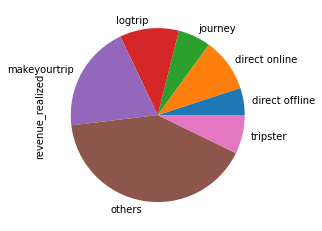

In [106]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')